In [15]:
# import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import root_mean_squared_error

In [16]:
# import the data and  drop no longer needed columns 
video_df = pd.read_csv("data/videos_prepared.csv")

remove_columns = ["video_id", "title", "channel_title"]
video_df.drop(columns=remove_columns, inplace=True)
video_df.head()

,caption,hour_published,weekday_published,month_published,hd,cat_Comedy,cat_Education,cat_Entertainment,cat_Film & Animation,cat_Gaming,...,term_year,term_years,term_youtu,term_youtube,log_view_count,log_channel_view_count,log_channel_sub_count,log_channel_video_count,log_duration_seconds,cbrt_description_length
0,0,0,6,11,1,0,0,0,0,0,...,0.0,0.000000,0.0,0.242716,7.828038,11.927885,7.384610,5.752573,3.555348,9.976612
1,0,20,4,4,1,0,0,0,0,0,...,0.0,0.237702,0.0,0.063177,7.350516,12.850665,8.366603,5.389072,8.147288,11.965177
2,0,18,3,10,0,0,0,0,0,0,...,0.0,0.000000,0.0,0.000000,7.446001,14.875077,8.767329,6.741701,3.951244,13.871269
3,0,19,0,11,1,0,0,0,0,0,...,0.0,0.000000,0.0,0.000000,5.937536,10.890628,6.786717,4.867534,4.955827,5.325074
4,1,20,2,10,1,0,0,0,0,0,...,0.0,0.000000,0.0,0.000000,12.229037,17.917472,13.030250,5.940171,6.678342,6.431228


In [17]:
# split into features and target variable

X = video_df.drop(columns="log_view_count")
y = video_df["log_view_count"]

# split into training and test data
SEED = 666
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_train.head()

,caption,hour_published,weekday_published,month_published,hd,cat_Comedy,cat_Education,cat_Entertainment,cat_Film & Animation,cat_Gaming,...,term_www,term_year,term_years,term_youtu,term_youtube,log_channel_view_count,log_channel_sub_count,log_channel_video_count,log_duration_seconds,cbrt_description_length
33,0,13,1,3,1,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.000000,13.930310,5.613128,3.951244,5.926926,5.167649
242,1,12,4,10,1,0,0,0,0,0,...,0.110052,0.0,0.0,0.0,0.000000,18.659140,14.159101,5.370638,6.115892,11.477587
455,0,19,0,1,1,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.059560,15.796762,11.455307,6.287859,8.357259,11.990734
342,0,12,0,9,1,0,0,1,0,0,...,0.379471,0.0,0.0,0.0,0.364798,14.976286,10.645449,5.762051,6.719013,9.480106
67,0,23,6,3,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.000000,9.933871,4.007333,2.995732,6.361302,5.718479


In [18]:
# instantiate the scaler, fit it to training data and transform training and test features
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
X_train_scaled

,caption,hour_published,weekday_published,month_published,hd,cat_Comedy,cat_Education,cat_Entertainment,cat_Film & Animation,cat_Gaming,...,term_www,term_year,term_years,term_youtu,term_youtube,log_channel_view_count,log_channel_sub_count,log_channel_video_count,log_duration_seconds,cbrt_description_length
0,-0.357771,-0.180753,-0.964382,-0.923881,0.285111,-0.075539,-0.276289,-0.466494,-0.100143,-0.053338,...,-0.914764,-0.171583,-0.19464,-0.442775,-0.558617,-0.621912,-1.741480,-1.562617,0.077656,-0.979400
1,2.795085,-0.338465,0.562316,1.104301,0.285111,-0.075539,-0.276289,-0.466494,-0.100143,-0.053338,...,0.080713,-0.171583,-0.19464,-0.442775,-0.558617,0.982349,1.299132,-0.567556,0.186218,0.775661
2,-0.357771,0.765518,-1.473282,-1.503362,0.285111,-0.075539,-0.276289,-0.466494,-0.100143,-0.053338,...,-0.914764,-0.171583,-0.19464,-0.442775,0.178338,0.011284,0.337137,0.075458,1.473897,0.918388
3,-0.357771,-0.338465,-1.473282,0.814561,0.285111,-0.075539,-0.276289,2.143651,-0.100143,-0.053338,...,2.517758,-0.171583,-0.19464,-0.442775,3.955122,-0.267063,0.048993,-0.293157,0.532715,0.220077
4,-0.357771,1.396365,1.580115,-0.923881,-3.507405,-0.075539,-0.276289,-0.466494,-0.100143,-0.053338,...,-0.914764,-0.171583,-0.19464,-0.442775,-0.558617,-1.977707,-2.312813,-2.232475,0.327207,-0.826191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-0.357771,-0.496177,1.580115,-0.923881,0.285111,-0.075539,-0.276289,2.143651,-0.100143,-0.053338,...,0.125094,-0.171583,-0.19464,2.000807,0.743674,0.370218,0.097981,0.245825,0.484238,0.849929
701,-0.357771,0.134670,-1.473282,0.524820,0.285111,-0.075539,-0.276289,2.143651,-0.100143,-0.053338,...,0.813198,-0.171583,-0.19464,1.587509,0.523410,0.370218,0.097981,0.245825,0.005953,0.919033
702,-0.357771,0.134670,1.071215,-0.344401,0.285111,-0.075539,-0.276289,-0.466494,-0.100143,-0.053338,...,0.236945,-0.171583,8.14794,-0.442775,-0.558617,-1.211935,-1.136359,-0.723990,0.422112,0.027947
703,-0.357771,0.923230,1.071215,-1.213622,0.285111,-0.075539,-0.276289,-0.466494,-0.100143,-0.053338,...,1.626511,-0.171583,-0.19464,-0.442775,-0.229380,0.714522,0.854414,0.209113,0.725921,2.080126


In [19]:
# find the optimal alpha value using lasso for feature selection to fit linear regression using r2 and rmse metrics
alpha = [0.001, 0.01, 0.1, 0.2, 0.3]
r2 = []
rmse = []

for a in alpha:
    lasso = Lasso(alpha=a, max_iter=5000)
    lasso.fit(X_train_scaled, y_train)
    X_train = X_train_scaled.iloc[:, lasso.coef_ > 0]
    X_test = X_test_scaled.iloc[:, lasso.coef_ > 0]
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    r2.append(linreg.score(X_test, y_test))
    rmse.append(root_mean_squared_error(y_test, y_pred))

pd.DataFrame({"alpha": alpha, "r2": r2, "rmse": rmse})


,alpha,r2,rmse
0,0.001,0.538889,1.856366
1,0.010,0.564629,1.803810
2,0.100,0.553770,1.826166
3,0.200,0.531305,1.871570
4,0.300,0.503022,1.927212


In [20]:
# 0.01 returned the highest r2 and lowest rmse
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
X_train_lasso = X_train_scaled.iloc[:, lasso.coef_ > 0]
X_test_lasso = X_test_scaled.iloc[:, lasso.coef_ > 0]
X_train_lasso

,caption,month_published,cat_Comedy,cat_Education,cat_Howto & Style,cat_Music,cat_News & Politics,cat_People & Blogs,cat_Sports,tag_vegetarian,...,term_want,term_website,term_winters,term_work,term_youtu,term_youtube,log_channel_view_count,log_channel_sub_count,log_duration_seconds,cbrt_description_length
0,-0.357771,-0.923881,-0.075539,-0.276289,-0.152388,-0.119952,-0.214462,-0.470996,-0.037689,-0.310521,...,-0.300713,-0.260108,-0.169577,-0.466039,-0.442775,-0.558617,-0.621912,-1.741480,0.077656,-0.979400
1,2.795085,1.104301,-0.075539,-0.276289,-0.152388,-0.119952,-0.214462,2.123161,-0.037689,-0.310521,...,1.602422,-0.260108,-0.169577,-0.466039,-0.442775,-0.558617,0.982349,1.299132,0.186218,0.775661
2,-0.357771,-1.503362,-0.075539,-0.276289,-0.152388,-0.119952,-0.214462,2.123161,-0.037689,-0.310521,...,1.949252,-0.260108,-0.169577,0.794766,-0.442775,0.178338,0.011284,0.337137,1.473897,0.918388
3,-0.357771,0.814561,-0.075539,-0.276289,-0.152388,-0.119952,-0.214462,-0.470996,-0.037689,-0.310521,...,1.667957,-0.260108,-0.169577,-0.466039,-0.442775,3.955122,-0.267063,0.048993,0.532715,0.220077
4,-0.357771,-0.923881,-0.075539,-0.276289,-0.152388,-0.119952,-0.214462,-0.470996,-0.037689,-0.310521,...,-0.300713,-0.260108,-0.169577,-0.466039,-0.442775,-0.558617,-1.977707,-2.312813,0.327207,-0.826191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-0.357771,-0.923881,-0.075539,-0.276289,-0.152388,-0.119952,-0.214462,-0.470996,-0.037689,-0.310521,...,1.687270,-0.260108,-0.169577,0.647960,2.000807,0.743674,0.370218,0.097981,0.484238,0.849929
701,-0.357771,0.524820,-0.075539,-0.276289,-0.152388,-0.119952,-0.214462,-0.470996,-0.037689,-0.310521,...,-0.300713,-0.260108,-0.169577,-0.466039,1.587509,0.523410,0.370218,0.097981,0.005953,0.919033
702,-0.357771,-0.344401,-0.075539,-0.276289,-0.152388,-0.119952,4.662825,-0.470996,-0.037689,-0.310521,...,-0.300713,-0.260108,-0.169577,-0.466039,-0.442775,-0.558617,-1.211935,-1.136359,0.422112,0.027947
703,-0.357771,-1.213622,-0.075539,-0.276289,-0.152388,-0.119952,-0.214462,2.123161,-0.037689,-0.310521,...,-0.300713,-0.260108,-0.169577,-0.466039,-0.442775,-0.229380,0.714522,0.854414,0.725921,2.080126


In [21]:
# fit the linear regression model to the feature extracted data
linreg = LinearRegression()
linreg.fit(X_train_lasso, y_train)
y_pred = linreg.predict(X_test_lasso)
r2 = linreg.score(X_test_lasso, y_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"r2: {r2}, rmse: {rmse}")

r2: 0.5646285275576869, rmse: 1.8038101836094933


In [22]:
# list the coefficients by highest absolute value for positive or negative impact on view count
coef_df = pd.Series(linreg.coef_, index=X_train_lasso.columns).sort_values(key=abs, ascending=False)
coef_top_10 = coef_df.head(10)
coef_top_10

log_channel_view_count           1.074448
cbrt_description_length         -0.562907
log_channel_sub_count            0.394156
term_ucbhciyivi2szjxjiepn4txg   -0.392274
term_joeycarbstrong              0.367311
term_truth                       0.304329
term_therammsden                 0.295479
term_supporter                   0.293110
cat_People & Blogs               0.284379
term_http                        0.270102
dtype: float64

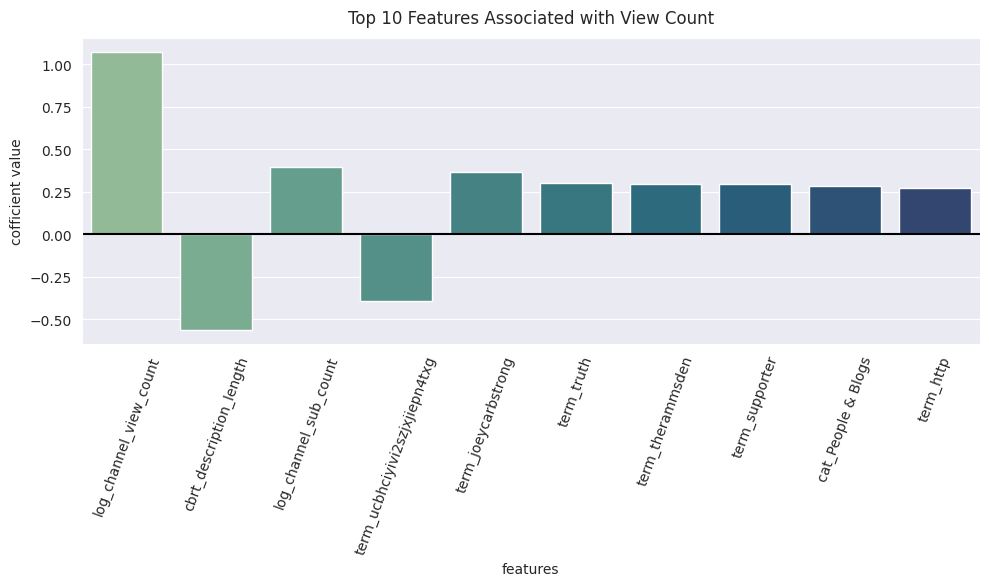

In [23]:
# visualize top 10 features
sns.set_style("darkgrid")
plt.subplots(figsize=(10, 6))
sns.barplot(x=coef_top_10.index, y=coef_top_10.values, palette="crest", hue=coef_top_10.index, legend=False)
plt.axhline(0, color="black")
plt.title("Top 10 Features Associated with View Count", y=1.02)
plt.ylabel("cofficient value")
plt.xlabel("features")
plt.xticks(rotation=70)
plt.tight_layout()

# save png
plt.savefig("images/top_10_features.png", dpi=300)

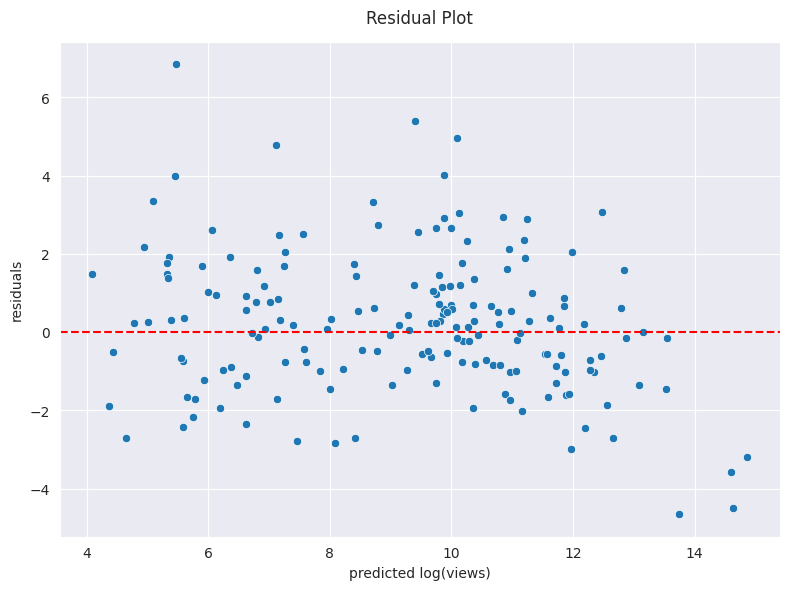

In [24]:
# visualize residuals to look for patterns
residuals = y_test - y_pred
plt.subplots(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("predicted log(views)")
plt.ylabel("residuals")
plt.title("Residual Plot", y=1.02)
plt.tight_layout()

# save png
plt.savefig("images/residual_plot")

In [25]:
# re-load video dataframe for video information
video_df = pd.read_csv("data/videos_prepared.csv")

# highest channel view count videos by highest video view count
video_df["max_view_count"] = video_df["log_view_count"].max()
top_10_chan_view_count_df = video_df[["channel_title", "title", "log_channel_view_count", "log_view_count", "max_view_count"]].sort_values(["log_channel_view_count", "log_view_count"], ascending=False).head(10)
top_10_chan_view_count_df

,channel_title,title,log_channel_view_count,log_view_count,max_view_count
35,TEDx Talks,Every Argument Against Veganism | Ed Winters |...,22.860034,14.666177,17.748831
745,TEDx Talks,A Plant-based Diet Changed My Life | Pat McAul...,22.860034,14.356877,17.748831
163,TEDx Talks,The Power of Plant-Based Eating | Dr. Joanne K...,22.860034,13.952898,17.748831
247,TEDx Talks,Why I'm A Vegan | Moby | TEDxVeniceBeach,22.860034,13.467482,17.748831
754,TEDx Talks,The Transformative Power of Raw Vegan Food | R...,22.860034,11.299930,17.748831
73,Brut India,Joaquin Phoenix On Why He's Vegan,22.074043,13.765239,17.748831
699,Brut India,Joaquin Phoenix's Powerful Speech on the Envir...,22.074043,9.961945,17.748831
306,Best Of TRS | English,Why Everyone Must Turn Vegetarian? Monk Explai...,20.649403,14.014606,17.748831
101,Big Think,Peter Singer: Animal suffering is human respon...,20.628524,9.951944,17.748831
591,Fitshortie,What I Eat As A Long-Term Raw Vegan,20.565845,13.971069,17.748831


In [26]:
# lowest description length videos by highest video view count
top_10_desc_len_count_df = video_df[["channel_title", "title", "cbrt_description_length", "log_view_count", "max_view_count"]].sort_values(["cbrt_description_length", "log_view_count"], ascending=[True, False]).head(10)
top_10_desc_len_count_df

,channel_title,title,cbrt_description_length,log_view_count,max_view_count
743,Arvind Animal Activist,Is Veganism Too Expensive? #vegan #rap #truth ...,1.44225,15.194317,17.748831
861,Arvind Animal Activist,"Only ""Yes"" or ""No"" #truth #motivation #vegan #...",1.44225,14.889786,17.748831
789,Dr. Bobby Price,Plant Based Food Is NOT Healthy - Dr. Bobby Price,1.44225,14.086851,17.748831
475,Arvind Animal Activist,Think From The Victim's Perspective #vegan #an...,1.44225,13.733994,17.748831
146,Nimai Delgado,“You Can’t Build Muscle On a Vegan Diet”,1.44225,13.360876,17.748831
681,Arvind Animal Activist,What Do Vegans Eat? #vegan #viral #speech #rap...,1.44225,13.309347,17.748831
850,Nimai Delgado,What I eat in a day as a vegan athlete 🥑🌱,1.44225,13.303653,17.748831
867,Nimai Delgado,What I eat as a vegan trainer 🍽️💪,1.44225,13.138313,17.748831
406,Joey Carbstrong,Carnivore threatens vegan “We’re gonna have a ...,1.44225,13.026654,17.748831
335,Arvind Animal Activist,How Do You Justify Killing Insects? #vegan #t...,1.44225,12.796921,17.748831


In [27]:
# highest sub count videos by highest video view count
top_10_sub_count_df = video_df[["channel_title", "title", "log_channel_sub_count", "log_view_count", "max_view_count"]].sort_values(["log_channel_sub_count", "log_view_count"], ascending=False).head(10)
top_10_sub_count_df

,channel_title,title,log_channel_sub_count,log_view_count,max_view_count
35,TEDx Talks,Every Argument Against Veganism | Ed Winters |...,17.581351,14.666177,17.748831
745,TEDx Talks,A Plant-based Diet Changed My Life | Pat McAul...,17.581351,14.356877,17.748831
163,TEDx Talks,The Power of Plant-Based Eating | Dr. Joanne K...,17.581351,13.952898,17.748831
247,TEDx Talks,Why I'm A Vegan | Moby | TEDxVeniceBeach,17.581351,13.467482,17.748831
754,TEDx Talks,The Transformative Power of Raw Vegan Food | R...,17.581351,11.299930,17.748831
101,Big Think,Peter Singer: Animal suffering is human respon...,15.893701,9.951944,17.748831
73,Brut India,Joaquin Phoenix On Why He's Vegan,15.321808,13.765239,17.748831
699,Brut India,Joaquin Phoenix's Powerful Speech on the Envir...,15.321808,9.961945,17.748831
320,Acharya Prashant,"Sir, how did you turn vegan? || Acharya Prashant",14.848695,11.756115,17.748831
177,OxfordUnion,Joey Carbstrong argues that animals are sentie...,14.652759,11.010399,17.748831


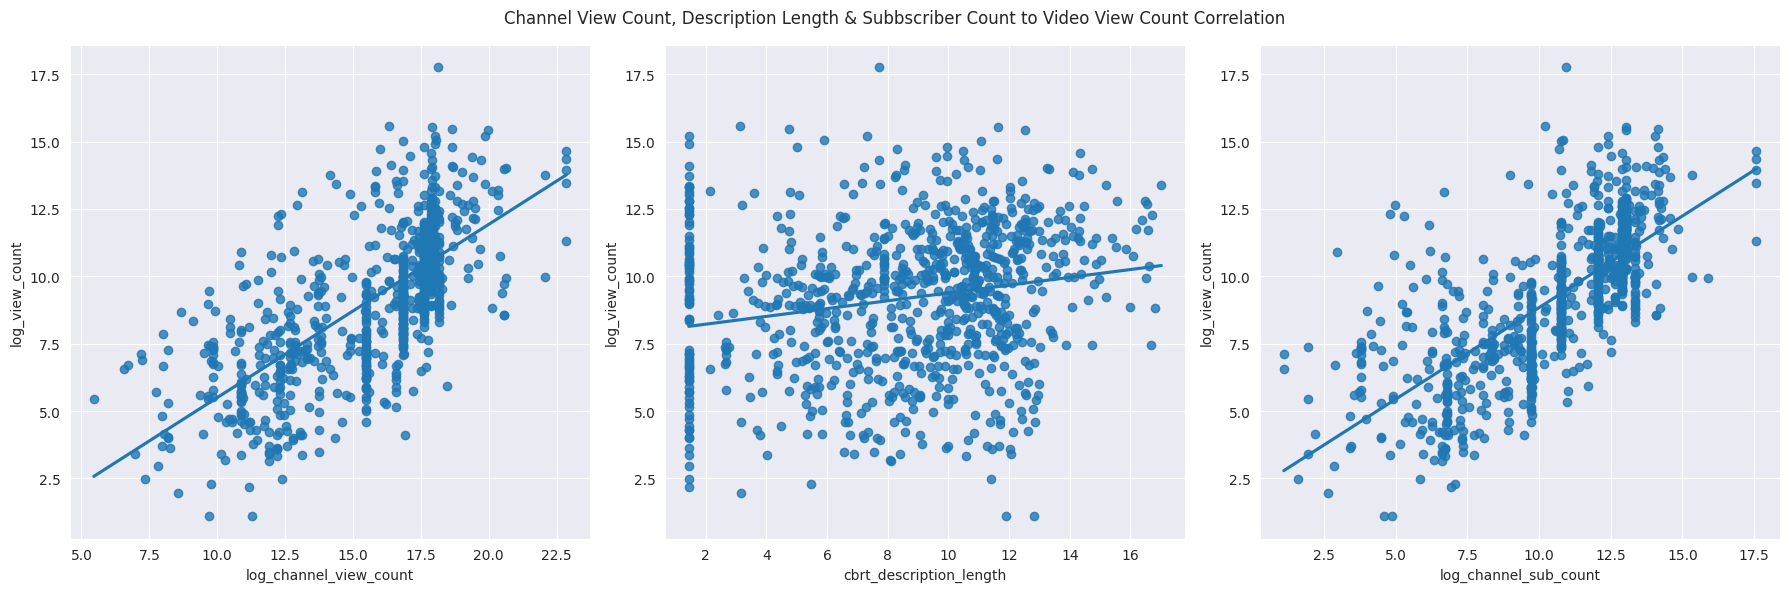

In [ ]:
# visualize individual regression lines of coefficients with highest impact on view count
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Channel View Count, Description Length & Subbscriber Count to Video View Count Correlation")
sns.regplot(ax=axes[0], data=video_df, x="log_channel_view_count", y="log_view_count", ci=None)
sns.regplot(ax=axes[1], data=video_df, x="cbrt_description_length", y="log_view_count", ci=None)
sns.regplot(ax=axes[2], data=video_df, x="log_channel_sub_count", y="log_view_count", ci=None)
plt.tight_layout()

plt.savefig("images/top_coefficient_regression_lines.png")